In [ ]:
import pandas as pd 
import numpy as np #linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv ('/content/avg_net_profit.csv')

In [ ]:
df

,product_category,avg_net_profit
0,Accessories,25.400541
1,Active,28.357332
2,Blazers & Jackets,57.380144
3,Clothing Sets,32.954471
4,Dresses,46.806975
5,Fashion Hoodies & Sweatshirts,26.402399
6,Intimates,15.752950
7,Jeans,45.601722
8,Jumpsuits & Rompers,21.627185
9,Leggings,10.760827


In [ ]:
df.describe()

,avg_net_profit
count,26.000000
mean,31.627839
std,18.520298
min,8.123083
25%,20.098654
50%,27.275174
75%,37.915866
max,80.173328


In [ ]:
df.isnull().sum()

product_category             0
avg_net_profit               0
Cluster2                     0
Cluster5                     0
gatau pokoknya clustering    0
dtype: int64

### 3.2 K-Means

* Dalam tahap awal kita akan menentukan initial `k`, dimana kita akan coba membuat cluster dengan nilai `k=5`.

* *Notes*. Durasi pelatihan model akan berbanding lurus dengan banyaknya data dan jumlah cluster (`k`) yang ditentukan

In [ ]:
X = df.iloc[:, [1]].values

In [ ]:
K = 5 #data kita latih
kmeans_5 = KMeans(n_clusters=K, random_state=11) # memanggil model kmeans dengan setting n_cluster sejumlah k

start = time()
kmeans_5.fit(X) #generate model fit()
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.028s


In [ ]:
K = 10
kmeans_10 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_10.fit(X)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.038s


* Setelah selesai dilatih, kita akan coba membuat kolom baru `clusters_of_5`, `cluster_of_10` pada data `df`, yang merepresentasikan cluster dari model-model tersebut, untuk selanjutnya dicari nilai _cardinality_

In [ ]:
X = df.assign(
    clusters_of_5=kmeans_5.predict(X),
    clusters_of_10=kmeans_10.predict(X)
)

with pd.option_context("display.max_columns", None):
    display(X.head())

,product_category,avg_net_profit,clusters_of_5,clusters_of_10
0,Accessories,25.400541,2,2
1,Active,28.357332,2,2
2,Blazers & Jackets,57.380144,1,1
3,Clothing Sets,32.954471,2,5
4,Dresses,46.806975,4,4


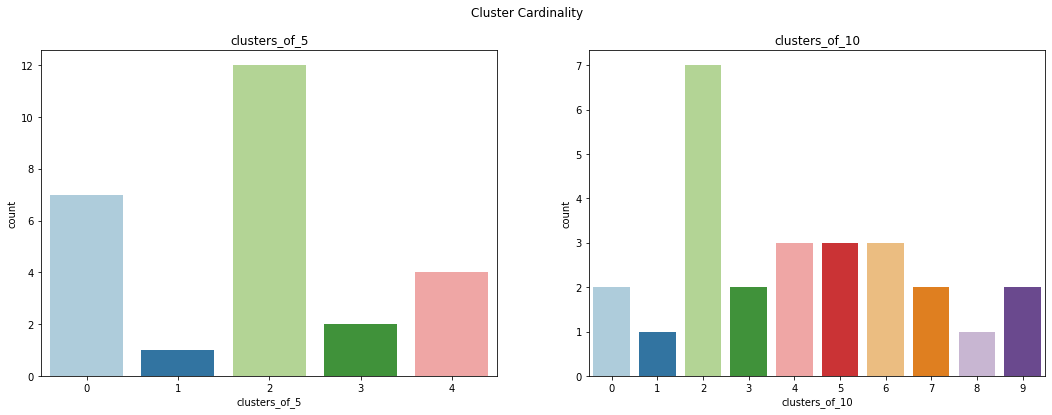

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(18, 6))
for ax, preds in zip(axis, ["clusters_of_5", "clusters_of_10"]):
    sns.countplot(x=preds, data=X, ax=ax, palette="Paired")
    ax.set_title(preds)
plt.suptitle("Cluster Cardinality")
plt.show()

Dari visualisasi _cluster cardinality_ di atas:
* Model dengan 5 cluster (k=5), terlihat bahwa terdapat perbedaan cukup jauh antara cluster `2` dengan cluster lainnya tetapi tidak ekstrim
* Model dengan 15 cluster (k=15), terlihat kardinalitas cluster `2` lebih banyak dibandingkan dengan cluster yang lain.

In [ ]:
X = df[['avg_net_profit']].values

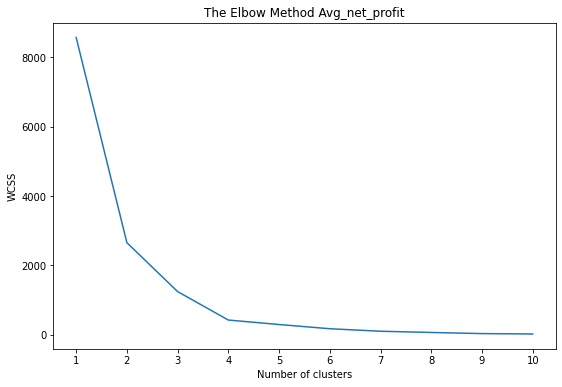

In [ ]:
# finding optimum number of clusters
wcss_list = [] #mempersiapkan perhitungan wcss

for i in range(1,11): #perintah looping
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88) #n_clusters jumlah kluster,init yang merupakan pemilihan jumlah K di awal (kali ini kita gunakan K++, agar tidak terkena jebakan centroid, random state memiliki kesempatan yg berbeda
    kmeans_test.fit(X) #perintah agar objek kmeans di line sebelumnya, digunakan untuk mengolah data X.
    wcss_list.append(kmeans_test.inertia_) #menghitung WCSS dengan menuliskan perintah append setelah wcss.

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method Avg_net_profit')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

In [ ]:
# KMeans
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(X) #prediksi pengelompokan cluster



In [ ]:
print(kmeans.labels_)

[3 3 1 3 1 3 0 1 3 0 3 2 3 3 0 3 3 3 0 0 1 2 1 3 0 0]


In [ ]:
df["CLUSTER AVG NET PROFIT"] = kmeans.labels_
df.head()

,product_category,avg_net_profit,AVG NET PROFIT,CLUSTER AVG NET PROFIT
0,Accessories,25.400541,3,3
1,Active,28.357332,3,3
2,Blazers & Jackets,57.380144,1,1
3,Clothing Sets,32.954471,3,3
4,Dresses,46.806975,1,1


No handles with labels found to put in legend.


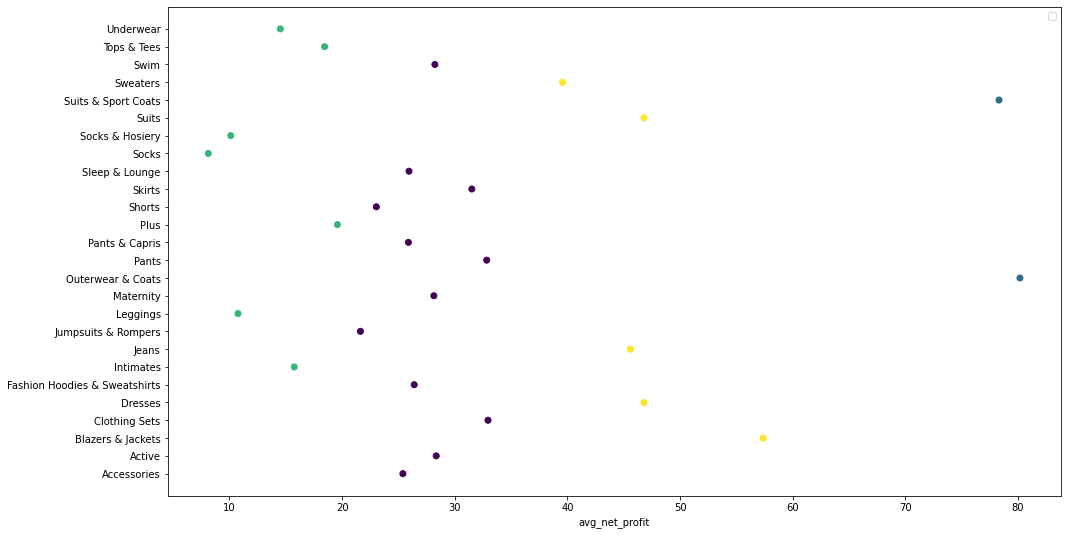

In [ ]:
plt.figure(1 , figsize = (16 ,9))
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['avg_net_profit'],df['product_category'],c = labels)
plt.xlabel('product_category')
plt.xlabel('avg_net_profit')
plt.legend()
plt.show()